# Project 2 b) and d) solution Lucas, David and Luis

## Importing packages

In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn

np.random.seed(12)

import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

## Importing defined function for Regression studies and Neural Network

In [2]:
import Regression_functions as rf
import mlp

## Part a) Producing the data for the one-dimensional Ising model

In [3]:
### define Ising model aprams
# system size
L = 40

np.random.seed(7)
# create 10000 random Ising states
states = np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J = np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
        
    print("printing the J matrix:")
    print(J)
    
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E

# calculate Ising energies
energies = ising_energies(states,L)

print("Shape of Ising energies: " , np.shape(energies))

printing the J matrix:
[[ 0. -1.  0. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0.  0.]]
Shape of Ising energies:  (10000,)


### Recasting the problem as a Linear Regression

In [4]:
## reshape Ising states into RL samples: S_iS_j --> X_p
states = np.einsum('...i,...j->...ij', states, states)
data = np.reshape(states, (np.size(states, 0), L*L))

## Run a train set of 400 data point. Essencially to compare our result with Mehta et al results. It is important to note
## that output represents the energies, while the input ("train" and "test") contains the design matrix.

# define number of samples
num_samples = 400
# define train and test data sets
train = data[:num_samples]
output_train = energies[:num_samples]
test = data[num_samples:3*num_samples//2]
output_test = energies[num_samples:3*num_samples//2]

## Part b) Estimating the coupling constant of the one-dimensional Ising model linear regression

### Computing MSE and R^2 score of train and test data, for OLS, Ridge and Lasso (with only 400 samples)

In [5]:
print ("Ordinary Least Squares method:")
print ("-------------------------------")
M, R, Mt, Rt, b = rf.OLS(train, output_train, test, output_test)

print("""The train MSE is: %.04f and the r^2-score is: %.04f.
The test MSE is: %.04f and the r^2-score is: %.04f""" % (Mt,Rt,M,R))
print("--------------------------------------------------------------------------")

print ("Ridge regression method:")
print ("-------------------------")
M, R, Mt, Rt, b = rf.Ridge(train, output_train, test, output_test)

print("""The train MSE is: %.04f and the r^2-score is: %.04f.
The test MSE is: %.04f and the r^2-score is: %.04f""" % (Mt,Rt,M,R))
print("--------------------------------------------------------------------------")

print ("Lasso regression method:")
print ("-------------------------")
M, R, Mt, Rt, b = rf.Lasso(train, output_train, test, output_test)

print("""The train MSE is: %.04f and the r^2-score is: %.04f.
The test MSE is: %.04f and the r^2-score is: %.04f""" % (Mt,Rt,M,R))

Ordinary Least Squares method:
-------------------------------
The train MSE is: 0.0000 and the r^2-score is: 1.0000.
The test MSE is: 14.6026 and the r^2-score is: 0.5240
--------------------------------------------------------------------------
Ridge regression method:
-------------------------
The train MSE is: 0.0000 and the r^2-score is: 1.0000.
The test MSE is: 14.6026 and the r^2-score is: 0.5240
--------------------------------------------------------------------------
Lasso regression method:
-------------------------
The train MSE is: 0.0000 and the r^2-score is: 1.0000.
The test MSE is: 27.6707 and the r^2-score is: 0.0981


### Testing different k with cross_validation (OLS) (may lead to memory error, if cross_validation is ran with the whole data)

In [6]:
# Here we decide the data that cross_validation will be executed with. 
data_run = train
output_run = output_train

# Defining testing k-folds
ks = [5, 6, 7, 8, 9, 10]

MSEs = np.empty(len(ks))
R2s = np.empty(len(ks))
MSEts = np.empty(len(ks))
R2ts = np.empty(len(ks))

for i,k in enumerate(ks):
    print("Running %d-fold cross validation" % k)
    _, _, _, _, MSEts[i], R2ts[i], MSEs[i], R2s[i] = rf.cross_validation(data_run, output_run, k)

Running 5-fold cross validation
The train average MSE for fold 1 is: 0.00000; the train average R^2-score for fold 1 is: 1.00
The test average MSE for fold 1 is: 23.31775; the test average R^2-score for fold 1 is: 0.42
The train average MSE for fold 2 is: 0.00000; the train average R^2-score for fold 2 is: 1.00
The test average MSE for fold 2 is: 31.33750; the test average R^2-score for fold 2 is: 0.46
The train average MSE for fold 3 is: 0.00000; the train average R^2-score for fold 3 is: 1.00
The test average MSE for fold 3 is: 30.17526; the test average R^2-score for fold 3 is: 0.44
The train average MSE for fold 4 is: 0.00000; the train average R^2-score for fold 4 is: 1.00
The test average MSE for fold 4 is: 21.57123; the test average R^2-score for fold 4 is: 0.40
The train average MSE for fold 5 is: 0.00000; the train average R^2-score for fold 5 is: 1.00
The test average MSE for fold 5 is: 21.48231; the test average R^2-score for fold 5 is: 0.49
The test average MSE is: 25.57681

The train average MSE for fold 4 is: 0.00000; the train average R^2-score for fold 4 is: 1.00
The test average MSE for fold 4 is: 22.96472; the test average R^2-score for fold 4 is: 0.55
The train average MSE for fold 5 is: 0.00000; the train average R^2-score for fold 5 is: 1.00
The test average MSE for fold 5 is: 22.59603; the test average R^2-score for fold 5 is: 0.49
The train average MSE for fold 6 is: 0.00000; the train average R^2-score for fold 6 is: 1.00
The test average MSE for fold 6 is: 26.08660; the test average R^2-score for fold 6 is: 0.50
The train average MSE for fold 7 is: 0.00000; the train average R^2-score for fold 7 is: 1.00
The test average MSE for fold 7 is: 23.30099; the test average R^2-score for fold 7 is: 0.44
The train average MSE for fold 8 is: 0.00000; the train average R^2-score for fold 8 is: 1.00
The test average MSE for fold 8 is: 28.20803; the test average R^2-score for fold 8 is: 0.49
The train average MSE for fold 9 is: 0.00000; the train average R

### Plotting k folds vs. MSE and R^2 score

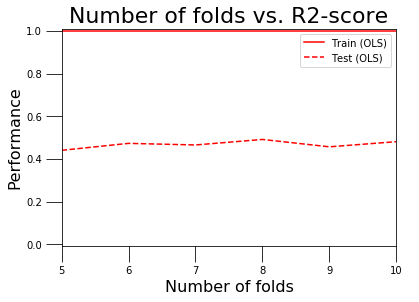

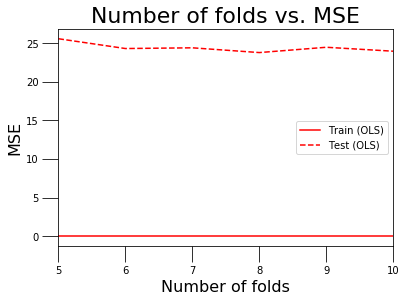

In [7]:
plt.plot(ks, R2ts, 'r', label="Train (OLS)")
plt.plot(ks, R2s, '--r', label="Test (OLS)")
plt.xlim([min(ks), max(ks)])
plt.ylim([-0.01, 1.01])
plt.xlabel("Number of folds", fontsize=16)
plt.ylabel("Performance", fontsize=16)
plt.title("Number of folds vs. R2-score", fontsize=22)
plt.legend()
plt.tick_params(size=16)
plt.figure()

plt.plot(ks, MSEts, 'r', label="Train (OLS)")
plt.plot(ks, MSEs, '--r', label="Test (OLS)")
plt.xlim([min(ks), max(ks)])
#plt.ylim([-0.01, 1.01])
plt.xlabel("Number of folds", fontsize=16)
plt.ylabel("MSE", fontsize=16)
plt.title("Number of folds vs. MSE", fontsize=22)
plt.legend()
plt.tick_params(size=16)
plt.show()

### Printing the coefficients of the various methods

Running the regression for lambda:  0.0001


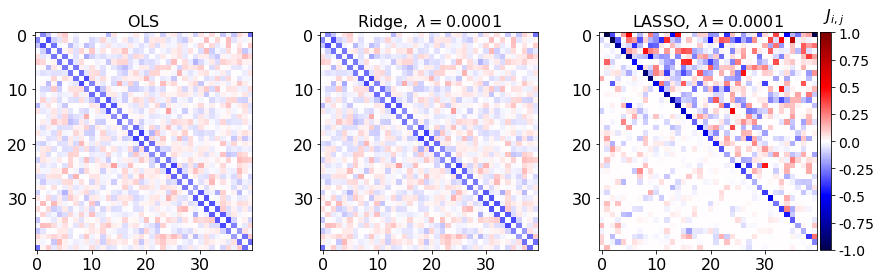

Running the regression for lambda:  0.001


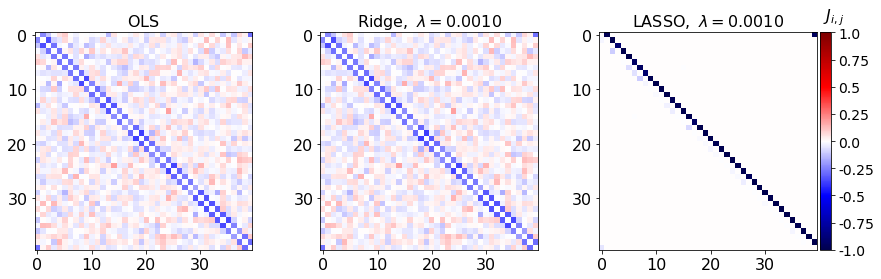

Running the regression for lambda:  0.01


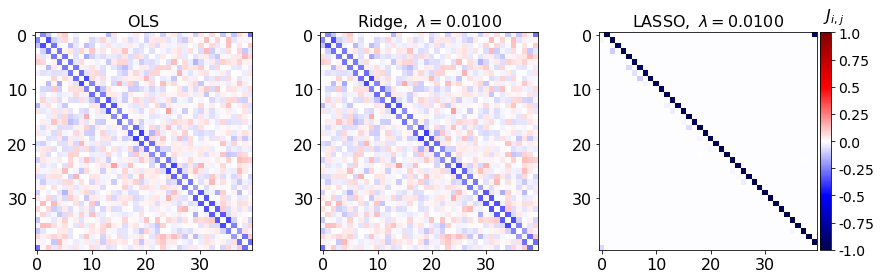

Running the regression for lambda:  0.1


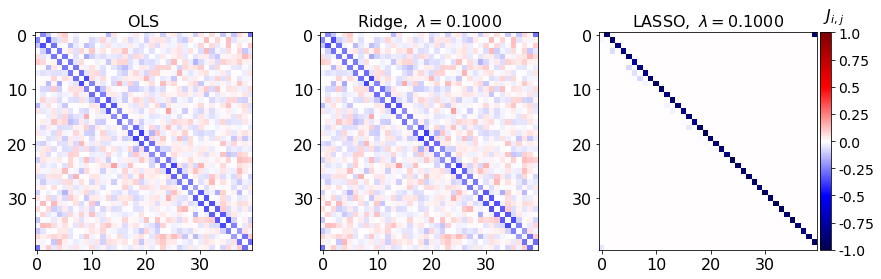

Running the regression for lambda:  1


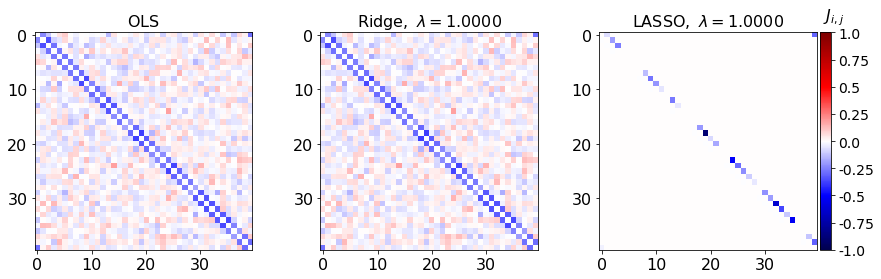

Running the regression for lambda:  10


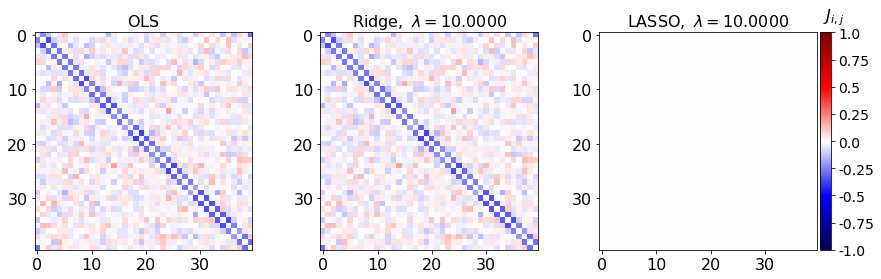

Running the regression for lambda:  100


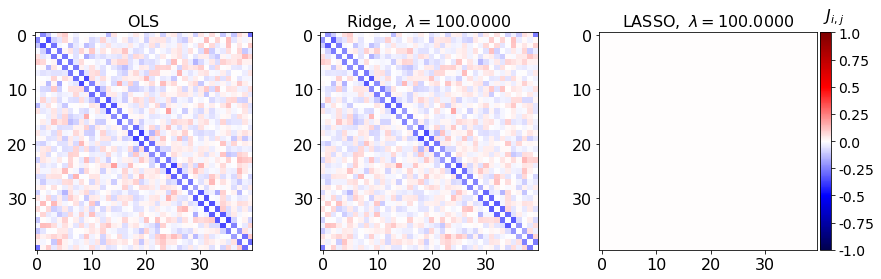

Running the regression for lambda:  1000


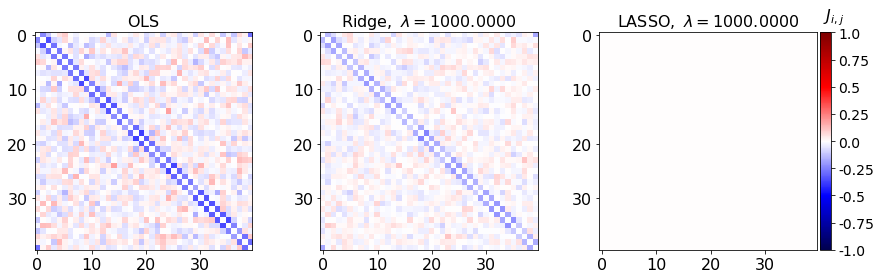

Running the regression for lambda:  10000.0


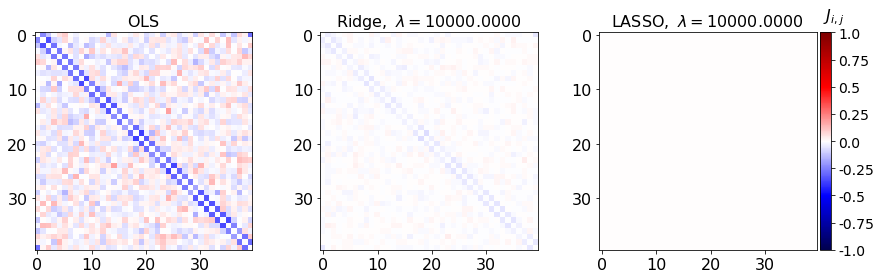

Running the regression for lambda:  100000.0


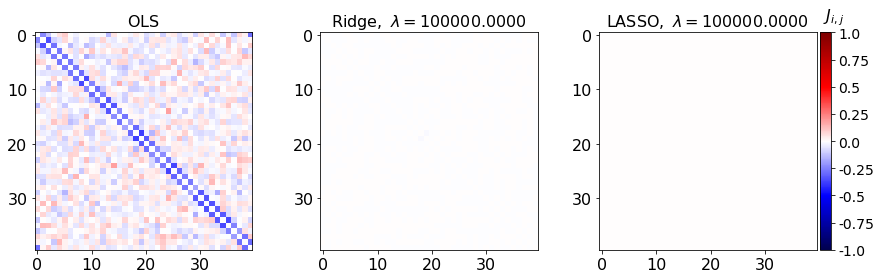

In [8]:
## Testing different parameters for Ridge and Lasso
# Defining different values of lambda
lams = [1e-4, 1e-3, 0.01, 0.1, 1, 10, 100, 1000, 1e4, 1e5]

M_O = np.empty(len(lams))
R_O = np.empty(len(lams))
Mt_O = np.empty(len(lams))
Rt_O = np.empty(len(lams))
M_R = np.empty(len(lams))
R_R = np.empty(len(lams))
Mt_R = np.empty(len(lams))
Rt_R = np.empty(len(lams))
M_L = np.empty(len(lams))
R_L = np.empty(len(lams))
Mt_L = np.empty(len(lams))
Rt_L = np.empty(len(lams))

for i, lam in enumerate(lams):

    print("Running the regression for lambda: ", lam)

    M_O[i], R_O[i], Mt_O[i], Rt_O[i], b_O = rf.OLS(train, output_train, test, output_test)
    M_R[i], R_R[i], Mt_R[i], Rt_R[i], b_R = rf.Ridge(train, output_train, test, output_test, lam=lam)
    M_L[i], R_L[i], Mt_L[i], Rt_L[i], b_L = rf.Lasso(train, output_train, test, output_test, lam=lam)

    ### plot Ising interaction J
    J_leastsq=np.array(b_O).reshape((L,L))
    J_ridge=np.array(b_R).reshape((L,L))
    J_lasso=np.array(b_L).reshape((L,L))

    cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

    fig, axarr = plt.subplots(nrows=1, ncols=3)
    
    axarr[0].imshow(J_leastsq,**cmap_args)
    axarr[0].set_title('$\\mathrm{OLS}$',fontsize=16)
    axarr[0].tick_params(labelsize=16)
    
    axarr[1].imshow(J_ridge,**cmap_args)
    axarr[1].set_title('$\\mathrm{Ridge},\ \\lambda=%.4f$' %(lam),fontsize=16)
    axarr[1].tick_params(labelsize=16)
    
    im=axarr[2].imshow(J_lasso,**cmap_args)
    axarr[2].set_title('$\\mathrm{LASSO},\ \\lambda=%.4f$' %(lam),fontsize=16)
    axarr[2].tick_params(labelsize=16)
    
    divider = make_axes_locatable(axarr[2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(im, cax=cax)
    
    cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)
    cbar.set_label('$J_{i,j}$',labelpad=-40, y=1.12,fontsize=16,rotation=0)
    
    fig.subplots_adjust(right=2.0)
    
    plt.show()

This are the exact same results obtained by Metha et al, hence reassuring us that our code works as it should.

### MSE and R2 score performance plot on both training and test data

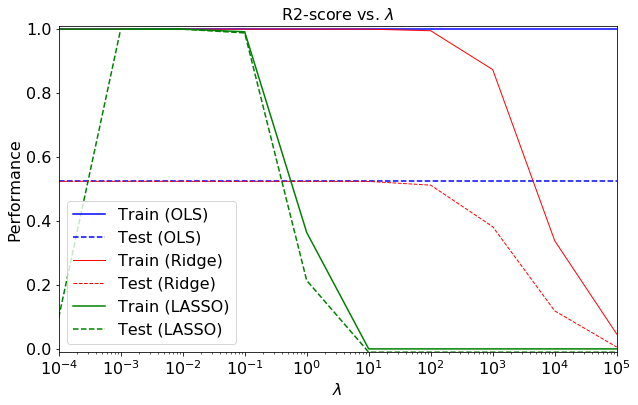

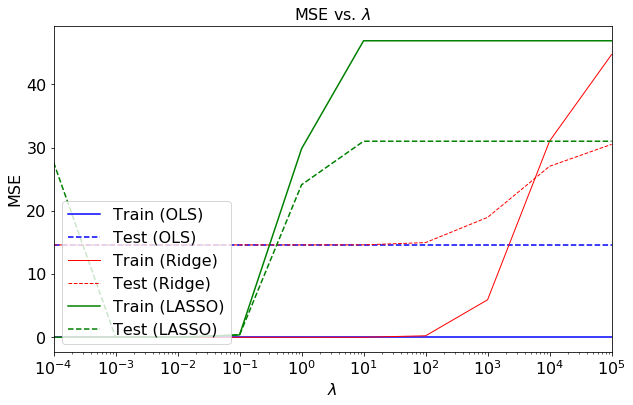

In [9]:
# Plot our performance on both the training and test data
plt.semilogx(lams, Rt_O, 'b',label='Train (OLS)')
plt.semilogx(lams, R_O,'--b',label='Test (OLS)')
plt.semilogx(lams, Rt_R,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lams, R_R,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lams, Rt_L, 'g',label='Train (LASSO)')
plt.semilogx(lams, R_L, '--g',label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

plt.legend(loc='lower left',fontsize=16)
plt.ylim([-0.01, 1.01])
plt.xlim([min(lams), max(lams)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Performance',fontsize=16)
plt.title(r'R2-score vs. $\lambda$', fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

# Plot our performance on both the training and test data
plt.semilogx(lams, Mt_O, 'b',label='Train (OLS)')
plt.semilogx(lams, M_O,'--b',label='Test (OLS)')
plt.semilogx(lams, Mt_R,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lams, M_R,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lams, Mt_L, 'g',label='Train (LASSO)')
plt.semilogx(lams, M_L, '--g',label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

plt.legend(loc='lower left',fontsize=16)
plt.xlim([min(lams), max(lams)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('MSE',fontsize=16)
plt.title(r'MSE vs. $\lambda$', fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

### Bias-variance Analysis

In [10]:
print("Cross-validation OLS")
print ("--------------------")
temp = rf.cross_validation(train, output_train, 5)
print("-----------------------------------------------------------------------")

print("Cross-validation Ridge")
print ("----------------------")
temp = rf.cross_validation(train, output_train, lam=0.01, method="Ridge")
print("-----------------------------------------------------------------------")

print("Cross-validation Lasso")
print ("----------------------")
temp = rf.cross_validation(train, output_train, lam=0.01, method="Lasso")

Cross-validation OLS
--------------------
The train average MSE for fold 1 is: 0.00000; the train average R^2-score for fold 1 is: 1.00
The test average MSE for fold 1 is: 19.49787; the test average R^2-score for fold 1 is: 0.45
The train average MSE for fold 2 is: 0.00000; the train average R^2-score for fold 2 is: 1.00
The test average MSE for fold 2 is: 27.57542; the test average R^2-score for fold 2 is: 0.46
The train average MSE for fold 3 is: 0.00000; the train average R^2-score for fold 3 is: 1.00
The test average MSE for fold 3 is: 22.53586; the test average R^2-score for fold 3 is: 0.51
The train average MSE for fold 4 is: 0.00000; the train average R^2-score for fold 4 is: 1.00
The test average MSE for fold 4 is: 29.10017; the test average R^2-score for fold 4 is: 0.46
The train average MSE for fold 5 is: 0.00000; the train average R^2-score for fold 5 is: 1.00
The test average MSE for fold 5 is: 31.87855; the test average R^2-score for fold 5 is: 0.31
The test average MSE is

## Part d) Regression analysis of the one-dimensional Ising model using neural networks

### Data preparation

In [11]:
# Defining training and validation sample size. 400 samples are used for training, since we want to compare the NN results
# with the Linear regression models.
num_samples = 500
train_samples = 400

train = data[:train_samples]
output_train = energies[:train_samples].reshape(train_samples,1)
valid = data[train_samples:num_samples]
output_valid = energies[train_samples:num_samples].reshape(num_samples - train_samples,1)
test = data[num_samples:3*num_samples//2]
output_test = energies[num_samples:3*num_samples//2].reshape(len(test),1)

### Defining plot functions

In [12]:
def plot_data(x,y,data):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    fig.colorbar(cax)

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center', fontsize=14)

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)

    plt.tight_layout()

    plt.show()

def plot_data_lam(x,y,data):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    fig.colorbar(cax)

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center', fontsize=14)

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{ReLU\\ Scaler}$',fontsize=fontsize)

    plt.tight_layout()

    plt.show()

### Testing different values of eta and number of hidden nodes (using training and output_training data)

In [13]:
etas = [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 0.1]
nodes = [1, 5, 10, 20]
ltr_acc = np.empty((len(nodes),len(etas)))
ltr_err = np.empty((len(nodes),len(etas)))
test_acc = np.empty((len(nodes),len(etas)))
test_err = np.empty((len(nodes),len(etas)))

for i,num_nodes in enumerate(nodes):
    for j, eta in enumerate(etas):
        net = mlp.mlp(train, output_train, num_nodes, eta=eta, net_type="regression", cost_function="MSE")

        val_err, val_acc, tr_err, tr_acc = net.earlystopping(train, output_train, valid, output_valid, 1000)

        s = len(val_acc)
        ltr_acc[i][j] = tr_acc[s-1]
        ltr_err[i][j] = tr_err[s-1]

        #print("################################")
        #print("Test Results for $\eta$ = %f and number of nodes %f" % (eta, num_nodes))
        test_err[i][j], test_acc[i][j] = net.test(test, output_test)

### Plotting eta vs. number of hidden nodes, results 

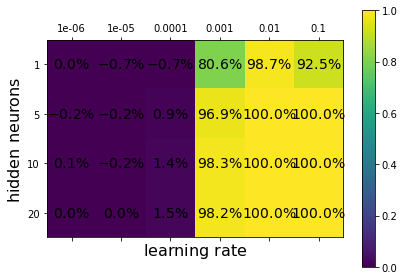

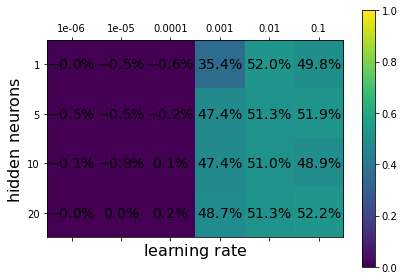

In [14]:
plot_data(etas, nodes, ltr_acc)
plot_data(etas, nodes, test_acc)

### Testing different values of lambda (ReLU Scaler) and eta for 10 hidden nodes (using training and output_training data)

In [15]:
lams = [0.001, 0.01, 0.1, 1]

ltr_acc = np.empty((len(lams),len(etas)))
ltr_err = np.empty((len(lams),len(etas)))
test_acc = np.empty((len(lams),len(etas)))
test_err = np.empty((len(lams),len(etas)))

for i,lam in enumerate(lams):
    for j, eta in enumerate(etas):
        net = mlp.mlp(train, output_train, 10, eta=eta, lam=lam, net_type="regression", cost_function="MSE")

        val_err, val_acc, tr_err, tr_acc = net.earlystopping(train, output_train, valid, output_valid, 1000)

        s = len(val_acc)
        ltr_acc[i][j] = tr_acc[s-1]
        ltr_err[i][j] = tr_err[s-1]

        #print("################################")
        #print("Test Results")
        test_err[i][j], test_acc[i][j] = net.test(test, output_test)

### Plotting lambda (ReLU Scaler) vs. eta for 10 hidden nodes, results 

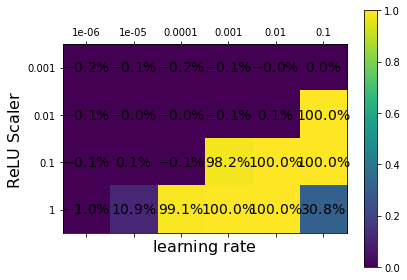

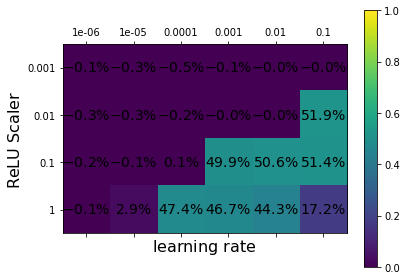

In [16]:
plot_data_lam(etas, lams, ltr_acc)
plot_data_lam(etas, lams, test_acc)